In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
# 2 main data types
series = pd.Series(["BMW", "Toyota", "Honda"])

In [4]:
series

0       BMW
1    Toyota
2     Honda
dtype: object

In [5]:
# series = 1-dimensional

In [6]:
colours = pd.Series(["Red", "Blue", "White"])
colours

0      Red
1     Blue
2    White
dtype: object

In [7]:
# DataFrame = 2-dimesnional

In [8]:
car_data = pd.DataFrame({"Car make": series, "Colour": colours})
car_data

,Car make,Colour
0,BMW,Red
1,Toyota,Blue
2,Honda,White


In [9]:
# Import Data

In [10]:
    car_sales = pd.read_csv("car-sales.csv")

In [11]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [12]:
# Exporting a DataFrame
car_sales.to_csv("exported_car_sales.csv", index=False)

In [13]:
exported_car_sales = pd.read_csv("exported_car_sales.csv")
exported_car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


## Viewing and selecting data

In [14]:
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"


In [15]:
# .loc and .iloc
animals = pd.Series(["cat", "dog", "bird", "pandas", "snake"], index=[0, 3, 9, 8, 3])

In [16]:
animals

0       cat
3       dog
9      bird
8    pandas
3     snake
dtype: object

In [17]:
animals.loc[3]

3      dog
3    snake
dtype: object

In [18]:
animals.loc[9]

'bird'

In [19]:
car_sales.loc[3]

Make                    BMW
Colour                Black
Odometer (KM)         11179
Doors                     5
Price            $22,000.00
Name: 3, dtype: object

In [20]:
animals

0       cat
3       dog
9      bird
8    pandas
3     snake
dtype: object

In [21]:
# .iloc refers to position
animals.iloc[3]

'pandas'

In [22]:
car_sales.iloc[3]

Make                    BMW
Colour                Black
Odometer (KM)         11179
Doors                     5
Price            $22,000.00
Name: 3, dtype: object

In [23]:
animals.iloc[:3]


0     cat
3     dog
9    bird
dtype: object

In [24]:
car_sales.loc[:3]

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"


In [25]:
car_sales.head(4)

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"


In [26]:
car_sales["Make"]

0    Toyota
1     Honda
2    Toyota
3       BMW
4    Nissan
5    Toyota
6     Honda
7     Honda
8    Toyota
9    Nissan
Name: Make, dtype: object

In [27]:
car_sales["Colour"]

0    White
1      Red
2     Blue
3    Black
4    White
5    Green
6     Blue
7     Blue
8    White
9    White
Name: Colour, dtype: object

In [28]:
car_sales[car_sales["Make"] == "Toyota"]

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
5,Toyota,Green,99213,4,"$4,500.00"
8,Toyota,White,60000,4,"$6,250.00"


In [29]:
car_sales[car_sales["Odometer (KM)"] > 100000]

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
4,Nissan,White,213095,4,"$3,500.00"


In [30]:
pd.crosstab(car_sales["Make"], car_sales["Doors"])

Doors,3,4,5
Make,,,
BMW,0,0,1
Honda,0,3,0
Nissan,0,2,0
Toyota,1,3,0


In [31]:
# Groupby
car_sales.groupby(["Make"]).mean()

,Odometer (KM),Doors
Make,,
BMW,11179.000000,5.00
Honda,62778.333333,4.00
Nissan,122347.500000,4.00
Toyota,85451.250000,3.75


<AxesSubplot:>

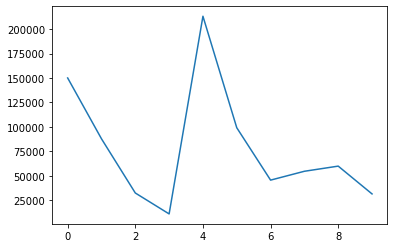

In [32]:
car_sales["Odometer (KM)"].plot()

<AxesSubplot:>

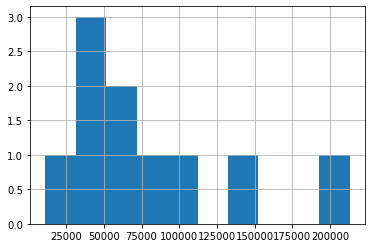

In [33]:
car_sales["Odometer (KM)"].hist()

In [34]:
car_sales["Price"].dtype

dtype('O')

In [35]:
# Convert 'Price' column to string (if it's not already)
car_sales["Price"] = car_sales["Price"].astype(str)

# Remove dollar signs and commas (but leave decimal for cents)
car_sales["Price"] = car_sales["Price"].str.replace('[\$\,]', '', regex=True)

# Remove everything after the decimal point (cents)
car_sales["Price"] = car_sales["Price"].str.split('.').str[0]

# Convert to integer and divide by 100 to correct the inflated values
car_sales["Price"] = car_sales["Price"].astype(int) / 100

# Convert back to integer after the division to get correct price
car_sales["Price"] = car_sales["Price"].astype(int)


In [36]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,40
1,Honda,Red,87899,4,50
2,Toyota,Blue,32549,3,70
3,BMW,Black,11179,5,220
4,Nissan,White,213095,4,35
5,Toyota,Green,99213,4,45
6,Honda,Blue,45698,4,75
7,Honda,Blue,54738,4,70
8,Toyota,White,60000,4,62
9,Nissan,White,31600,4,97


<AxesSubplot:>

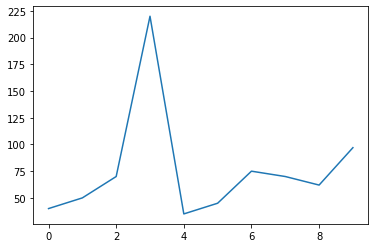

In [37]:
car_sales["Price"].plot()

## Manipulating Data

In [38]:
car_sales['Make'].str.lower()

0    toyota
1     honda
2    toyota
3       bmw
4    nissan
5    toyota
6     honda
7     honda
8    toyota
9    nissan
Name: Make, dtype: object

In [39]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,40
1,Honda,Red,87899,4,50
2,Toyota,Blue,32549,3,70
3,BMW,Black,11179,5,220
4,Nissan,White,213095,4,35
5,Toyota,Green,99213,4,45
6,Honda,Blue,45698,4,75
7,Honda,Blue,54738,4,70
8,Toyota,White,60000,4,62
9,Nissan,White,31600,4,97


In [40]:
car_sales_missing = pd.read_csv('car-sales-missing-data.csv')
car_sales_missing

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,"$4,000"
1,Honda,Red,87899.0,4.0,"$5,000"
2,Toyota,Blue,NaN,3.0,"$7,000"
3,BMW,Black,11179.0,5.0,"$22,000"
4,Nissan,White,213095.0,4.0,"$3,500"
5,Toyota,Green,NaN,4.0,"$4,500"
6,Honda,NaN,NaN,4.0,"$7,500"
7,Honda,Blue,NaN,4.0,NaN
8,Toyota,White,60000.0,NaN,NaN
9,NaN,White,31600.0,4.0,"$9,700"


In [41]:
car_sales_missing['Odometer'].fillna(car_sales_missing['Odometer'].mean())

0    150043.000000
1     87899.000000
2     92302.666667
3     11179.000000
4    213095.000000
5     92302.666667
6     92302.666667
7     92302.666667
8     60000.000000
9     31600.000000
Name: Odometer, dtype: float64

In [42]:
car_sales_missing

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,"$4,000"
1,Honda,Red,87899.0,4.0,"$5,000"
2,Toyota,Blue,NaN,3.0,"$7,000"
3,BMW,Black,11179.0,5.0,"$22,000"
4,Nissan,White,213095.0,4.0,"$3,500"
5,Toyota,Green,NaN,4.0,"$4,500"
6,Honda,NaN,NaN,4.0,"$7,500"
7,Honda,Blue,NaN,4.0,NaN
8,Toyota,White,60000.0,NaN,NaN
9,NaN,White,31600.0,4.0,"$9,700"


In [43]:
car_sales_missing = pd.read_csv('car-sales-missing-data.csv')
car_sales_missing

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,"$4,000"
1,Honda,Red,87899.0,4.0,"$5,000"
2,Toyota,Blue,NaN,3.0,"$7,000"
3,BMW,Black,11179.0,5.0,"$22,000"
4,Nissan,White,213095.0,4.0,"$3,500"
5,Toyota,Green,NaN,4.0,"$4,500"
6,Honda,NaN,NaN,4.0,"$7,500"
7,Honda,Blue,NaN,4.0,NaN
8,Toyota,White,60000.0,NaN,NaN
9,NaN,White,31600.0,4.0,"$9,700"


In [44]:
car_sales_missing_dropped = car_sales_missing.dropna()
car_sales_missing_dropped

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,"$4,000"
1,Honda,Red,87899.0,4.0,"$5,000"
3,BMW,Black,11179.0,5.0,"$22,000"
4,Nissan,White,213095.0,4.0,"$3,500"


In [45]:
car_sales_missing_dropped.to_csv('car-sales-missing-dropped')

In [46]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,40
1,Honda,Red,87899,4,50
2,Toyota,Blue,32549,3,70
3,BMW,Black,11179,5,220
4,Nissan,White,213095,4,35
5,Toyota,Green,99213,4,45
6,Honda,Blue,45698,4,75
7,Honda,Blue,54738,4,70
8,Toyota,White,60000,4,62
9,Nissan,White,31600,4,97


In [47]:
# Column from series
seats_column = pd.Series([5, 5, 5, 5, 5])

# New column called seats
car_sales['Seats'] = seats_column
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats
0,Toyota,White,150043,4,40,5.0
1,Honda,Red,87899,4,50,5.0
2,Toyota,Blue,32549,3,70,5.0
3,BMW,Black,11179,5,220,5.0
4,Nissan,White,213095,4,35,5.0
5,Toyota,Green,99213,4,45,NaN
6,Honda,Blue,45698,4,75,NaN
7,Honda,Blue,54738,4,70,NaN
8,Toyota,White,60000,4,62,NaN
9,Nissan,White,31600,4,97,NaN


In [48]:
car_sales['Seats'].fillna(5, inplace=True)

In [49]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats
0,Toyota,White,150043,4,40,5.0
1,Honda,Red,87899,4,50,5.0
2,Toyota,Blue,32549,3,70,5.0
3,BMW,Black,11179,5,220,5.0
4,Nissan,White,213095,4,35,5.0
5,Toyota,Green,99213,4,45,5.0
6,Honda,Blue,45698,4,75,5.0
7,Honda,Blue,54738,4,70,5.0
8,Toyota,White,60000,4,62,5.0
9,Nissan,White,31600,4,97,5.0


In [50]:
# Column from Python list
fuel_economy = [7.5, 9.2, 5.0, 9.6, 8.7, 4.7, 7.6, 8.7, 3.0, 4.5]
car_sales['Fuel per 100 KM'] = fuel_economy
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel per 100 KM
0,Toyota,White,150043,4,40,5.0,7.5
1,Honda,Red,87899,4,50,5.0,9.2
2,Toyota,Blue,32549,3,70,5.0,5.0
3,BMW,Black,11179,5,220,5.0,9.6
4,Nissan,White,213095,4,35,5.0,8.7
5,Toyota,Green,99213,4,45,5.0,4.7
6,Honda,Blue,45698,4,75,5.0,7.6
7,Honda,Blue,54738,4,70,5.0,8.7
8,Toyota,White,60000,4,62,5.0,3.0
9,Nissan,White,31600,4,97,5.0,4.5


In [51]:
car_sales['Total fuel used (L)'] = car_sales['Odometer (KM)']/100 * car_sales['Fuel per 100 KM']
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel per 100 KM,Total fuel used (L)
0,Toyota,White,150043,4,40,5.0,7.5,11253.225
1,Honda,Red,87899,4,50,5.0,9.2,8086.708
2,Toyota,Blue,32549,3,70,5.0,5.0,1627.450
3,BMW,Black,11179,5,220,5.0,9.6,1073.184
4,Nissan,White,213095,4,35,5.0,8.7,18539.265
5,Toyota,Green,99213,4,45,5.0,4.7,4663.011
6,Honda,Blue,45698,4,75,5.0,7.6,3473.048
7,Honda,Blue,54738,4,70,5.0,8.7,4762.206
8,Toyota,White,60000,4,62,5.0,3.0,1800.000
9,Nissan,White,31600,4,97,5.0,4.5,1422.000


In [52]:
# Create column from a single value
car_sales['Number of wheels'] = 4
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel per 100 KM,Total fuel used (L),Number of wheels
0,Toyota,White,150043,4,40,5.0,7.5,11253.225,4
1,Honda,Red,87899,4,50,5.0,9.2,8086.708,4
2,Toyota,Blue,32549,3,70,5.0,5.0,1627.450,4
3,BMW,Black,11179,5,220,5.0,9.6,1073.184,4
4,Nissan,White,213095,4,35,5.0,8.7,18539.265,4
5,Toyota,Green,99213,4,45,5.0,4.7,4663.011,4
6,Honda,Blue,45698,4,75,5.0,7.6,3473.048,4
7,Honda,Blue,54738,4,70,5.0,8.7,4762.206,4
8,Toyota,White,60000,4,62,5.0,3.0,1800.000,4
9,Nissan,White,31600,4,97,5.0,4.5,1422.000,4


In [53]:
car_sales['Passed road safety'] = True
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel per 100 KM,Total fuel used (L),Number of wheels,Passed road safety
0,Toyota,White,150043,4,40,5.0,7.5,11253.225,4,True
1,Honda,Red,87899,4,50,5.0,9.2,8086.708,4,True
2,Toyota,Blue,32549,3,70,5.0,5.0,1627.450,4,True
3,BMW,Black,11179,5,220,5.0,9.6,1073.184,4,True
4,Nissan,White,213095,4,35,5.0,8.7,18539.265,4,True
5,Toyota,Green,99213,4,45,5.0,4.7,4663.011,4,True
6,Honda,Blue,45698,4,75,5.0,7.6,3473.048,4,True
7,Honda,Blue,54738,4,70,5.0,8.7,4762.206,4,True
8,Toyota,White,60000,4,62,5.0,3.0,1800.000,4,True
9,Nissan,White,31600,4,97,5.0,4.5,1422.000,4,True


In [54]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel per 100 KM,Total fuel used (L),Number of wheels,Passed road safety
0,Toyota,White,150043,4,40,5.0,7.5,11253.225,4,True
1,Honda,Red,87899,4,50,5.0,9.2,8086.708,4,True
2,Toyota,Blue,32549,3,70,5.0,5.0,1627.450,4,True
3,BMW,Black,11179,5,220,5.0,9.6,1073.184,4,True
4,Nissan,White,213095,4,35,5.0,8.7,18539.265,4,True
5,Toyota,Green,99213,4,45,5.0,4.7,4663.011,4,True
6,Honda,Blue,45698,4,75,5.0,7.6,3473.048,4,True
7,Honda,Blue,54738,4,70,5.0,8.7,4762.206,4,True
8,Toyota,White,60000,4,62,5.0,3.0,1800.000,4,True
9,Nissan,White,31600,4,97,5.0,4.5,1422.000,4,True


In [85]:
car_sales_shuffled = car_sales.sample(frac=1)
car_sales_shuffled

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel per 100 KM,Total fuel used (L),Number of wheels,Passed road safety
3,BMW,Black,11179,5,220,5.0,9.6,1073.184,4,True
8,Toyota,White,60000,4,62,5.0,3.0,1800.000,4,True
2,Toyota,Blue,32549,3,70,5.0,5.0,1627.450,4,True
5,Toyota,Green,99213,4,45,5.0,4.7,4663.011,4,True
4,Nissan,White,213095,4,35,5.0,8.7,18539.265,4,True
1,Honda,Red,87899,4,50,5.0,9.2,8086.708,4,True
6,Honda,Blue,45698,4,75,5.0,7.6,3473.048,4,True
0,Toyota,White,150043,4,40,5.0,7.5,11253.225,4,True
7,Honda,Blue,54738,4,70,5.0,8.7,4762.206,4,True
9,Nissan,White,31600,4,97,5.0,4.5,1422.000,4,True


In [86]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel per 100 KM,Total fuel used (L),Number of wheels,Passed road safety
0,Toyota,White,150043,4,40,5.0,7.5,11253.225,4,True
1,Honda,Red,87899,4,50,5.0,9.2,8086.708,4,True
2,Toyota,Blue,32549,3,70,5.0,5.0,1627.450,4,True
3,BMW,Black,11179,5,220,5.0,9.6,1073.184,4,True
4,Nissan,White,213095,4,35,5.0,8.7,18539.265,4,True
5,Toyota,Green,99213,4,45,5.0,4.7,4663.011,4,True
6,Honda,Blue,45698,4,75,5.0,7.6,3473.048,4,True
7,Honda,Blue,54738,4,70,5.0,8.7,4762.206,4,True
8,Toyota,White,60000,4,62,5.0,3.0,1800.000,4,True
9,Nissan,White,31600,4,97,5.0,4.5,1422.000,4,True


In [87]:
# Only select 20 percent of data
car_sales_shuffled.sample(frac=0.2)

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel per 100 KM,Total fuel used (L),Number of wheels,Passed road safety
8,Toyota,White,60000,4,62,5.0,3.0,1800.000,4,True
4,Nissan,White,213095,4,35,5.0,8.7,18539.265,4,True


In [81]:
car_sales_shuffled

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel per 100 KM,Total fuel used (L),Number of wheels,Passed road safety
7,Honda,Blue,54738,4,70,5.0,8.7,4762.206,4,True
1,Honda,Red,87899,4,50,5.0,9.2,8086.708,4,True
4,Nissan,White,213095,4,35,5.0,8.7,18539.265,4,True
6,Honda,Blue,45698,4,75,5.0,7.6,3473.048,4,True
5,Toyota,Green,99213,4,45,5.0,4.7,4663.011,4,True
3,BMW,Black,11179,5,220,5.0,9.6,1073.184,4,True
0,Toyota,White,150043,4,40,5.0,7.5,11253.225,4,True
2,Toyota,Blue,32549,3,70,5.0,5.0,1627.450,4,True
8,Toyota,White,60000,4,62,5.0,3.0,1800.000,4,True
9,Nissan,White,31600,4,97,5.0,4.5,1422.000,4,True


In [89]:
car_sales_shuffled.reset_index(drop = True, inplace=True)
car_sales_shuffled

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel per 100 KM,Total fuel used (L),Number of wheels,Passed road safety
0,BMW,Black,11179,5,220,5.0,9.6,1073.184,4,True
1,Toyota,White,60000,4,62,5.0,3.0,1800.000,4,True
2,Toyota,Blue,32549,3,70,5.0,5.0,1627.450,4,True
3,Toyota,Green,99213,4,45,5.0,4.7,4663.011,4,True
4,Nissan,White,213095,4,35,5.0,8.7,18539.265,4,True
5,Honda,Red,87899,4,50,5.0,9.2,8086.708,4,True
6,Honda,Blue,45698,4,75,5.0,7.6,3473.048,4,True
7,Toyota,White,150043,4,40,5.0,7.5,11253.225,4,True
8,Honda,Blue,54738,4,70,5.0,8.7,4762.206,4,True
9,Nissan,White,31600,4,97,5.0,4.5,1422.000,4,True


In [90]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel per 100 KM,Total fuel used (L),Number of wheels,Passed road safety
0,Toyota,White,150043,4,40,5.0,7.5,11253.225,4,True
1,Honda,Red,87899,4,50,5.0,9.2,8086.708,4,True
2,Toyota,Blue,32549,3,70,5.0,5.0,1627.450,4,True
3,BMW,Black,11179,5,220,5.0,9.6,1073.184,4,True
4,Nissan,White,213095,4,35,5.0,8.7,18539.265,4,True
5,Toyota,Green,99213,4,45,5.0,4.7,4663.011,4,True
6,Honda,Blue,45698,4,75,5.0,7.6,3473.048,4,True
7,Honda,Blue,54738,4,70,5.0,8.7,4762.206,4,True
8,Toyota,White,60000,4,62,5.0,3.0,1800.000,4,True
9,Nissan,White,31600,4,97,5.0,4.5,1422.000,4,True


In [92]:
car_sales['Odometer (KM)'] = car_sales['Odometer (KM)'].apply(lambda x: x / 1.6)
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel per 100 KM,Total fuel used (L),Number of wheels,Passed road safety
0,Toyota,White,58610.546875,4,40,5.0,7.5,11253.225,4,True
1,Honda,Red,34335.546875,4,50,5.0,9.2,8086.708,4,True
2,Toyota,Blue,12714.453125,3,70,5.0,5.0,1627.450,4,True
3,BMW,Black,4366.796875,5,220,5.0,9.6,1073.184,4,True
4,Nissan,White,83240.234375,4,35,5.0,8.7,18539.265,4,True
5,Toyota,Green,38755.078125,4,45,5.0,4.7,4663.011,4,True
6,Honda,Blue,17850.781250,4,75,5.0,7.6,3473.048,4,True
7,Honda,Blue,21382.031250,4,70,5.0,8.7,4762.206,4,True
8,Toyota,White,23437.500000,4,62,5.0,3.0,1800.000,4,True
9,Nissan,White,12343.750000,4,97,5.0,4.5,1422.000,4,True


## 1. Try it
## 2. Search for it
## 3. Try again
## 4. Ask